In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('../../solving_pde_mooc/notebooks/styles/mainstyle.use')

import numpy as np

In [2]:
alpha = 0.25    # exponential law coefficient

ti = 0.0        # initial time
tf = 5.0        # final time
dt = 0.1        # time step

Ni = 100        # initial condition

In [3]:
# computing no. of steps
# no. of steps must be an integer and it can be obtained from tf - ti / dt
# but the above formula might give float values since tf, ti and dt are float
# therefore we need to convert it to integer using int function
# int function converts float to integer by ignoring the decimal
# e.g. int(5.0/2.0)=2
nt = int((tf-ti)/dt)

# now we create a numpy array for intermediate value of N including those at ti and tf
# empty array means values in the array have not been initialized and can take any value
# in the range allowed by numerical precision
# initializing takes time, so unless you need an array of zeros, np.empty is better over np.zeros
N = np.empty(nt+1)

# passing the initial condition to array
N[0] = Ni

# building the array by time stepping
# since N has nt+1 elements, we will loop index i from 0 -> nt, and define N[i+1] 
for i in range(nt):
    N[i+1] = N[i] - alpha*N[i]*dt

In [4]:
# to compute the exact solution, we need the time array

# since nt=int(tf-ti/dt) gives no. of elements in the array as nt+1
# and since the N(numerical) array had nt+1 elements initiliazed as N=np.empty(nt+1)
# we need our time array to also have nt+1 elements
# moreover, each element should be index multiplied by dt
t = np.arange(nt+1) * dt

# now we can build the exact solution
Nexact = Ni*np.exp(-alpha*t)

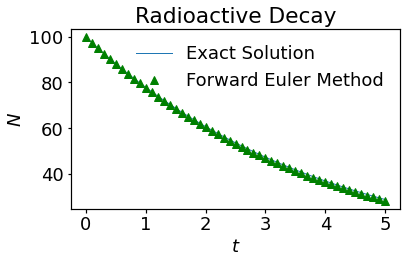

In [5]:
# create a figure with a single plot
fig, ax = plt.subplots()

ax.plot(t,Nexact,linestyle='-', label='Exact Solution')
ax.plot(t,N,'^',color='green',label='Forward Euler Method')

ax.set_xlabel('$t$')
ax.set_ylabel('$N$')
ax.set_title('Radioactive Decay')

ax.legend()
